## Golf Analysis 

Data is from the Hole19 app of my round history.

In [1]:
# Golf Analysis from Hole19 data.

import pandas as pd
import numpy as np

df = pd.read_csv('./data/Hole19Download.csv', header=None)

df = pd.DataFrame(df.values.reshape(-1, 8), 
                  columns=['Date','Course','GameType','OverPar','Score', 'Putts', 'GIRPerc', 'FairwayHitPerc'])

df.head()

,Date,Course,GameType,OverPar,Score,Putts,GIRPerc,FairwayHitPerc
0,17 May 2023,William Sahm Golf Course,14 Holes STK PLAY,11,64,26,28.60%,40.00%
1,09 May 2023,William Sahm Golf Course,9 Holes STK PLAY,3,38,16,55.60%,57.10%
2,07 May 2023,StonyCreek Golf Club (Par 3),9 Holes STK PLAY,3,30,19,77.80%,0%
3,06 May 2023,StonyCreek Golf Club (The Championship),18 Holes STK PLAY,13,84,39,55.60%,50.00%
4,22 Apr 2023,William Sahm Golf Course,9 Holes STK PLAY,11,46,18,33.30%,57.10%


### Definitions

Table grain is at the round level.

|Column Name|Description|
|---|---|
|Date|Date of round|
|Course|Name of golf course|
|GameType|Number of holes and type of game played|
|OverPar|Number of strokes over par|
|Score|Total score (Score - OverPar = Par for the Course)|
|Putts|Total number of putts|
|GIRPerc|Greens hit in regulation as a percentage|
|FairwayHitPerc|Total percentage of fairways as a percentage|



In [2]:
# create a new column 'new_column_name' based on the text of 'old_column_name'
df = df.assign(NumHoles=df['GameType'].str[:2])

In [3]:
df.head()

,Date,Course,GameType,OverPar,Score,Putts,GIRPerc,FairwayHitPerc,NumHoles
0,17 May 2023,William Sahm Golf Course,14 Holes STK PLAY,11,64,26,28.60%,40.00%,14
1,09 May 2023,William Sahm Golf Course,9 Holes STK PLAY,3,38,16,55.60%,57.10%,9
2,07 May 2023,StonyCreek Golf Club (Par 3),9 Holes STK PLAY,3,30,19,77.80%,0%,9
3,06 May 2023,StonyCreek Golf Club (The Championship),18 Holes STK PLAY,13,84,39,55.60%,50.00%,18
4,22 Apr 2023,William Sahm Golf Course,9 Holes STK PLAY,11,46,18,33.30%,57.10%,9


In [4]:
df = df[df.OverPar != "E"]

df['GIRPerc'] = list(map(lambda x: x[:-1], df['GIRPerc'].values))
df['FairwayHitPerc'] = list(map(lambda x: x[:-1], df['FairwayHitPerc'].values))

# convert column "a" of a DataFrame
df["OverPar"] = pd.to_numeric(df["OverPar"])
df["Score"] = pd.to_numeric(df["Score"])
df["Putts"] = pd.to_numeric(df["Putts"])
df["GIRPerc"] = pd.to_numeric(df["GIRPerc"])
df["FairwayHitPerc"] = pd.to_numeric(df["FairwayHitPerc"])
df["NumHoles"] = pd.to_numeric(df["NumHoles"])

df = df[df.OverPar > 0]

In [5]:
df.head()

,Date,Course,GameType,OverPar,Score,Putts,GIRPerc,FairwayHitPerc,NumHoles
0,17 May 2023,William Sahm Golf Course,14 Holes STK PLAY,11,64,26,28.6,40.0,14
1,09 May 2023,William Sahm Golf Course,9 Holes STK PLAY,3,38,16,55.6,57.1,9
2,07 May 2023,StonyCreek Golf Club (Par 3),9 Holes STK PLAY,3,30,19,77.8,0.0,9
3,06 May 2023,StonyCreek Golf Club (The Championship),18 Holes STK PLAY,13,84,39,55.6,50.0,18
4,22 Apr 2023,William Sahm Golf Course,9 Holes STK PLAY,11,46,18,33.3,57.1,9


In [6]:
df.count()

Date              42
Course            42
GameType          42
OverPar           42
Score             42
Putts             42
GIRPerc           42
FairwayHitPerc    42
NumHoles          42
dtype: int64

In [7]:
df.describe()

,OverPar,Score,Putts,GIRPerc,FairwayHitPerc,NumHoles
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,10.642857,66.809524,28.238095,35.719048,56.045238,14.428571
std,4.443803,19.903717,9.100548,17.841405,16.635859,4.179759
min,3.000000,30.000000,15.000000,0.000000,0.000000,9.000000
25%,8.000000,44.500000,18.000000,22.200000,50.000000,9.000000
50%,11.000000,79.500000,31.000000,33.300000,57.100000,18.000000
75%,13.750000,84.000000,36.750000,44.400000,63.225000,18.000000
max,23.000000,95.000000,40.000000,77.800000,100.000000,18.000000


In [8]:

df.NumHoles.unique()

array([14,  9, 18, 13, 12], dtype=int64)

In [9]:
df.dtypes


Date               object
Course             object
GameType           object
OverPar             int64
Score               int64
Putts               int64
GIRPerc           float64
FairwayHitPerc    float64
NumHoles            int64
dtype: object

In [10]:
#calculate quartiles for each numeric column in DataFrame
df.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)

,OverPar,Score,Putts,GIRPerc,FairwayHitPerc,NumHoles
0.25,8.00,44.5,18.00,22.2,50.000,9.0
0.50,11.00,79.5,31.00,33.3,57.100,18.0
0.75,13.75,84.0,36.75,44.4,63.225,18.0


In [11]:
df.tail()

,Date,Course,GameType,OverPar,Score,Putts,GIRPerc,FairwayHitPerc,NumHoles
39,17 May 2022,Ironwood Golf Club (The Lakes-The Ridge),9 Holes STK PLAY,3,39,16,66.7,71.4,9
40,27 Apr 2022,William Sahm Golf Course,18 Holes STK PLAY,16,86,39,38.9,50.0,18
41,14 Apr 2022,William Sahm Golf Course,9 Holes STK PLAY,4,39,15,0.0,57.1,9
42,12 Apr 2022,River Glen Country Club,9 Holes STK PLAY,7,42,15,11.1,28.6,9
43,02 Mar 2022,William Sahm Golf Course,9 Holes STK PLAY,6,41,17,11.1,57.1,9


In [12]:
dfplot = pd.DataFrame(df.groupby('Course').OverPar.mean())

In [13]:
import plotly.express as px
fig = px.bar(dfplot)
fig.show()

### Check correlations between GIR and Putts

In [14]:
df.corr()

,OverPar,Score,Putts,GIRPerc,FairwayHitPerc,NumHoles
OverPar,1.000000,0.813524,0.769908,-0.175140,0.018766,0.697839
Score,0.813524,1.000000,0.960194,0.061743,-0.053068,0.981098
Putts,0.769908,0.960194,1.000000,0.233063,-0.157406,0.955854
GIRPerc,-0.175140,0.061743,0.233063,1.000000,-0.216078,0.147460
FairwayHitPerc,0.018766,-0.053068,-0.157406,-0.216078,1.000000,-0.117758
NumHoles,0.697839,0.981098,0.955854,0.147460,-0.117758,1.000000


### Correlations

We can see the correlation between strokes over par and green in regulations is slightly negative. While I wouldn't say this is correlated, it is a good sanity check to understand that as my score goes down, the green in regulations go up. 

My putts are correlated to scoring over par. The more putts I hit, my score goes up.

In [15]:
df.head()

,Date,Course,GameType,OverPar,Score,Putts,GIRPerc,FairwayHitPerc,NumHoles
0,17 May 2023,William Sahm Golf Course,14 Holes STK PLAY,11,64,26,28.6,40.0,14
1,09 May 2023,William Sahm Golf Course,9 Holes STK PLAY,3,38,16,55.6,57.1,9
2,07 May 2023,StonyCreek Golf Club (Par 3),9 Holes STK PLAY,3,30,19,77.8,0.0,9
3,06 May 2023,StonyCreek Golf Club (The Championship),18 Holes STK PLAY,13,84,39,55.6,50.0,18
4,22 Apr 2023,William Sahm Golf Course,9 Holes STK PLAY,11,46,18,33.3,57.1,9


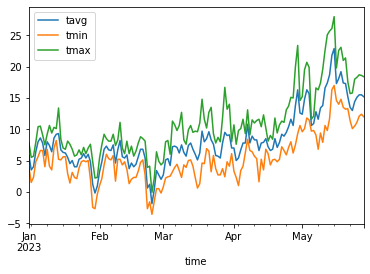

In [29]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31)

# Create Point for Vancouver, BC
location = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(location, start, end)
data = pd.DataFrame(data.fetch())

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [32]:
data.reset_index(level=0, inplace=True)

data.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2023-01-01,5.8,3.9,7.8,0.0,NaN,65.0,4.4,NaN,1018.7,NaN
1,2023-01-02,3.5,1.5,5.5,0.0,NaN,32.0,4.1,NaN,1008.0,NaN
2,2023-01-03,4.0,2.3,5.7,1.3,NaN,50.0,9.2,133.2,1009.9,NaN
3,2023-01-04,6.4,4.8,7.9,0.1,NaN,78.0,7.3,140.4,1008.2,NaN
4,2023-01-05,8.0,5.6,10.4,2.8,NaN,65.0,10.8,176.4,999.7,NaN


In [35]:
df.join(data.set_index('time'), on='Date')

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [27]:
print (pd.merge(df, data, left_on='Date', right_on='time', how='left').drop('id1', axis=1))

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [24]:
pd.DataFrame(data)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2018-01-01,1.8,-0.4,4.0,0.0,0.0,NaN,8.7,0.0,1030.7,NaN
2018-01-02,1.8,-0.4,3.9,0.0,0.0,NaN,7.1,0.0,1028.5,NaN
2018-01-03,2.3,1.2,3.4,0.0,NaN,NaN,6.8,0.0,1022.5,NaN
2018-01-04,4.1,1.6,6.6,0.0,0.0,NaN,6.1,0.0,1016.7,NaN
2018-01-05,7.6,5.7,9.5,30.4,0.0,NaN,10.0,0.0,1014.5,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-12-27,3.6,1.8,5.3,0.0,0.0,74.0,7.2,NaN,1027.8,NaN
2018-12-28,3.8,2.8,4.8,24.5,0.0,66.0,17.6,NaN,1025.2,NaN
2018-12-29,7.5,4.6,10.3,16.6,0.0,180.0,25.3,208.8,1013.7,NaN


In [ ]:
df18 = df[df['NumHoles'] > 10]
df9 = df[df['NumHoles'] <= 10]

In [ ]:
df18.head()

,Date,Course,GameType,OverPar,Score,Putts,GIRPerc,FairwayHitPerc,NumHoles
0,17 May 2023,William Sahm Golf Course,14 Holes STK PLAY,11,64,26,28.6,40.0,14
3,06 May 2023,StonyCreek Golf Club (The Championship),18 Holes STK PLAY,13,84,39,55.6,50.0,18
5,15 Apr 2023,William Sahm Golf Course,18 Holes STK PLAY,9,79,32,33.3,50.0,18
6,03 Apr 2023,William Sahm Golf Course,18 Holes STK PLAY,13,83,32,22.2,46.2,18
7,28 Mar 2023,William Sahm Golf Course,18 Holes STK PLAY,10,80,30,22.2,57.1,18


In [ ]:
def CourseAverage(df):
        if df[df['NumHoles']] == 9:
                df = pd.DataFrame(df.groupby('Course').OverPar.mean())
                df['HoleNum'] == 9
        else:
                df = pd.DataFrame(df.groupby('Course').OverPar.mean())
                df['HoleNum'] == 18
        print(df)

In [ ]:
dfplot9.head()

NameError: name 'dfplot9' is not defined

In [ ]:
df['18HoleFlag'] = np.where(df['NumHoles'] > 10, True, False)

In [ ]:
df = pd.DataFrame(df.groupby(['Course', 'NumHoles', '18HoleFlag']).OverPar.mean())

In [ ]:
df.head()

,,,OverPar
Course,NumHoles,18HoleFlag,
Brickyard Crossing GC,18,True,23.00
Brookshire Golf Club,9,False,10.75
StonyCreek Golf Club (Par 3),9,False,3.00
StonyCreek Golf Club (The Championship),18,True,13.00
William Sahm Golf Course,9,False,7.00


In [ ]:
import plotly.express as px

df = df
fig = px.bar(df, x='Course', y='OverPar',
             hover_data=['GameType', 'Putts'], color='18HoleFlag',
             labels={'OverPar':'Strokes over par'}, height=400)
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['OverPar'] but received: Course

In [ ]:
import plotly.express as px

df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='country',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

In [ ]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.12,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.33,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.93,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.10,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.93,13177000,16788.62948,AUS,36


In [ ]:
import plotly.express as px

df = dfplot
fig = px.bar(df, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], color='country',
             labels={'pop':'population of Canada'}, height=400)
fig.show()

NameError: name 'dfplot' is not defined